# LOAN PREDICTION ANALYSIS(CLASSIFICATION) USING MACHINE LEARNING ALGORITHMS


# IMPORT MODULES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import *
import warnings
warnings.filterwarnings("ignore")

# LOADING DATASETS

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area,Loan_Sanction_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency)
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Loan_ID                               614 non-null    object 
 1   Gender                                601 non-null    object 
 2   Married                               611 non-null    object 
 3   Dependents                            599 non-null    object 
 4   Education                             614 non-null    object 
 5   Self_Employed                         582 non-null    object 
 6   ApplicantIncome                       614 non-null    int64  
 7   CoapplicantIncome                     614 non-null    float64
 8   LoanAmount                            592 non-null    float64
 9   Loan_Amount_Term                      600 non-null    float64
 10  Credit_History(based on delinquency)  564 non-null    float64
 11  Property_Area      

In [6]:
t=pd.read_csv("test.csv")
t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
t.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency)
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Loan_ID                               367 non-null    object 
 1   Gender                                356 non-null    object 
 2   Married                               367 non-null    object 
 3   Dependents                            357 non-null    object 
 4   Education                             367 non-null    object 
 5   Self_Employed                         344 non-null    object 
 6   ApplicantIncome                       367 non-null    int64  
 7   CoapplicantIncome                     367 non-null    int64  
 8   LoanAmount                            362 non-null    float64
 9   Loan_Amount_Term                      361 non-null    float64
 10  Credit_History(based on delinquency)  338 non-null    float64
 11  Property_Area      

# PREPROCESSING THE DATASET

### FIND THE NULL VALUES

#### FILL THE MISSING VALUES FOR NUMERICAL TERMS = MEAN

#### FILL THE MISSING VALUES FOR CATEGORICAL TERMS = MODE

In [9]:
df.isnull().sum()

Loan_ID                                  0
Gender                                  13
Married                                  3
Dependents                              15
Education                                0
Self_Employed                           32
ApplicantIncome                          0
CoapplicantIncome                        0
LoanAmount                              22
Loan_Amount_Term                        14
Credit_History(based on delinquency)    50
Property_Area                            0
Loan_Sanction_Status                     0
dtype: int64

In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History(based on delinquency)'] = df['Credit_History(based on delinquency)'].fillna(df['Credit_History(based on delinquency)'].mean())

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID                                 0
Gender                                  0
Married                                 0
Dependents                              0
Education                               0
Self_Employed                           0
ApplicantIncome                         0
CoapplicantIncome                       0
LoanAmount                              0
Loan_Amount_Term                        0
Credit_History(based on delinquency)    0
Property_Area                           0
Loan_Sanction_Status                    0
dtype: int64

In [14]:
t.isnull().sum()

Loan_ID                                  0
Gender                                  11
Married                                  0
Dependents                              10
Education                                0
Self_Employed                           23
ApplicantIncome                          0
CoapplicantIncome                        0
LoanAmount                               5
Loan_Amount_Term                         6
Credit_History(based on delinquency)    29
Property_Area                            0
dtype: int64

In [15]:
t['LoanAmount'] = t['LoanAmount'].fillna(t['LoanAmount'].mean())
t['Loan_Amount_Term'] = t['Loan_Amount_Term'].fillna(t['Loan_Amount_Term'].mean())
t['Credit_History(based on delinquency)'] = t['Credit_History(based on delinquency)'].fillna(t['Credit_History(based on delinquency)'].mean())

In [16]:
t['Gender'] = t['Gender'].fillna(t['Gender'].mode()[0])
t['Dependents'] = t['Dependents'].fillna(t['Dependents'].mode()[0])
t['Self_Employed'] = t['Self_Employed'].fillna(t['Self_Employed'].mode()[0])

In [17]:
t.isnull().sum()

Loan_ID                                 0
Gender                                  0
Married                                 0
Dependents                              0
Education                               0
Self_Employed                           0
ApplicantIncome                         0
CoapplicantIncome                       0
LoanAmount                              0
Loan_Amount_Term                        0
Credit_History(based on delinquency)    0
Property_Area                           0
dtype: int64

# EXPLORATORY DATA ANALYSIS


### CATEGORICAL ATTRIBUTES VISUALIZATION

<AxesSubplot:xlabel='Gender', ylabel='count'>

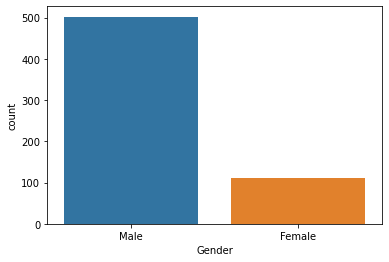

In [18]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

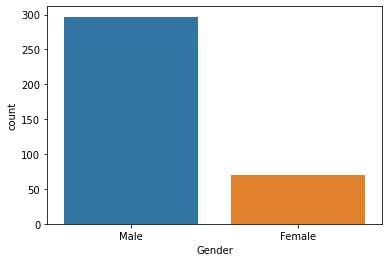

In [19]:
sns.countplot(t['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

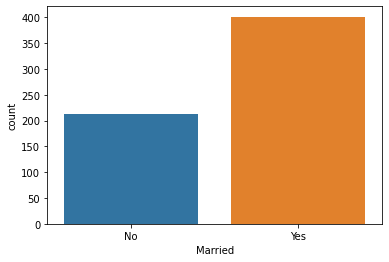

In [20]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Married', ylabel='count'>

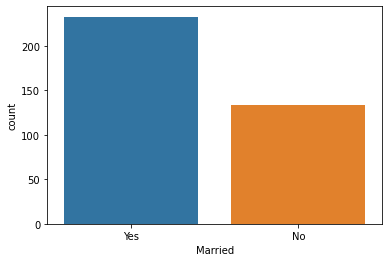

In [21]:
sns.countplot(t['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

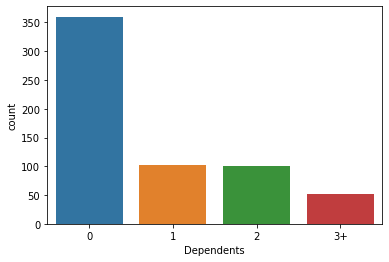

In [22]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

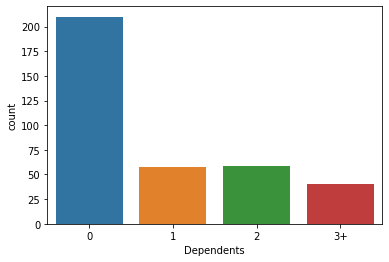

In [23]:
sns.countplot(t['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

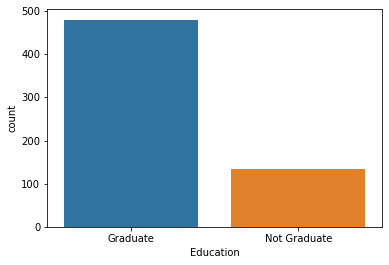

In [24]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Education', ylabel='count'>

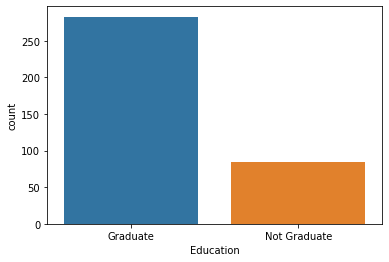

In [25]:
sns.countplot(t['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

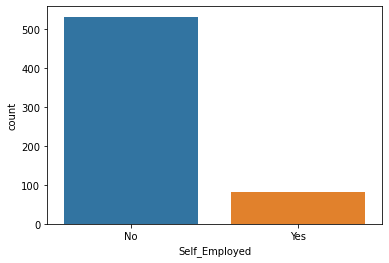

In [26]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

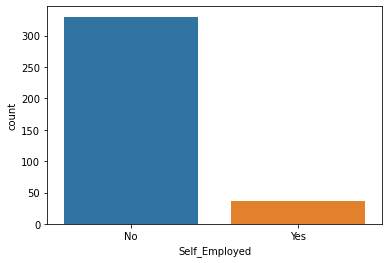

In [27]:
sns.countplot(t['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

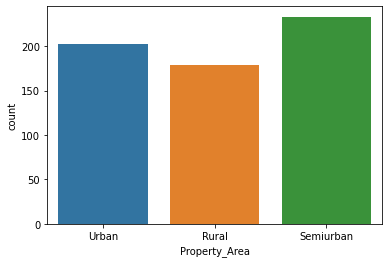

In [28]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

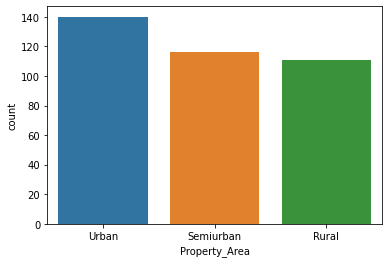

In [29]:
sns.countplot(t['Property_Area'])

<AxesSubplot:xlabel='Loan_Sanction_Status', ylabel='count'>

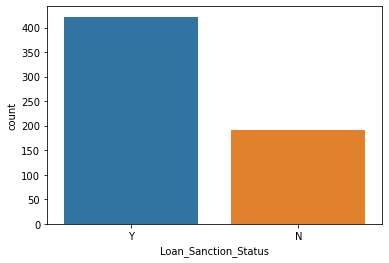

In [30]:
sns.countplot(df['Loan_Sanction_Status'])

### NUMERICAL ATTRIBUTES VISUALIZATION

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

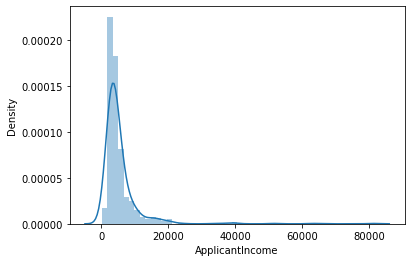

In [31]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

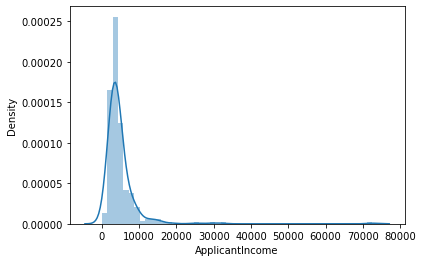

In [32]:
sns.distplot(t['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

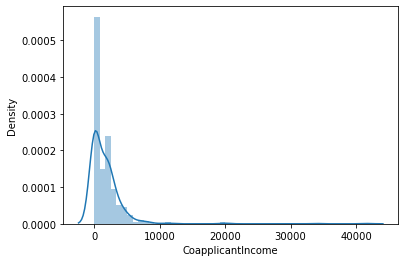

In [33]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

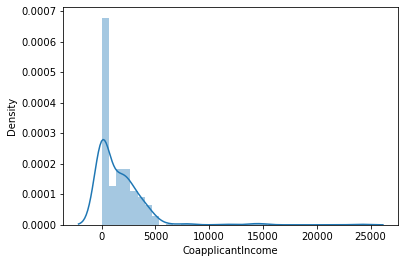

In [34]:
sns.distplot(t['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

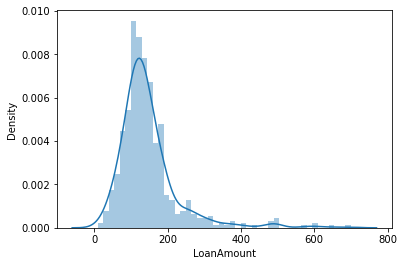

In [35]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

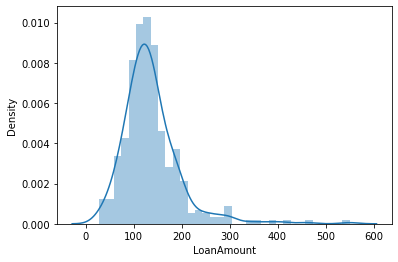

In [36]:
sns.distplot(t['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

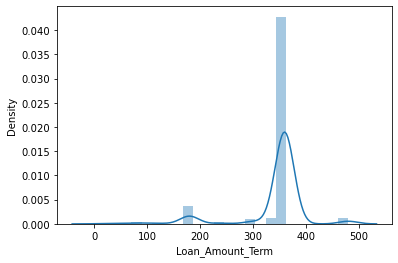

In [37]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

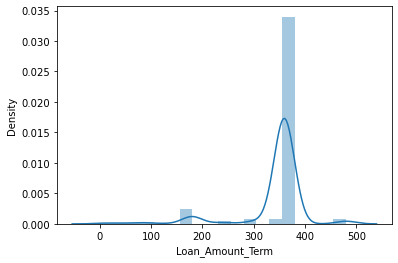

In [38]:
sns.distplot(t['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History(based on delinquency)', ylabel='Density'>

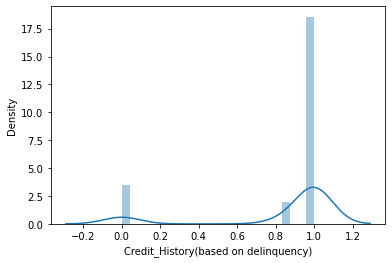

In [39]:
sns.distplot(df['Credit_History(based on delinquency)'])

<AxesSubplot:xlabel='Credit_History(based on delinquency)', ylabel='Density'>

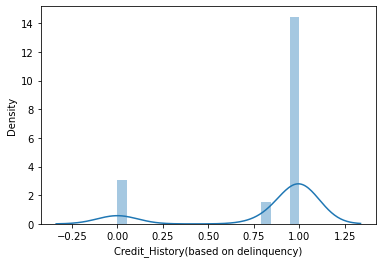

In [40]:
sns.distplot(t['Credit_History(based on delinquency)'])

# CREATION OF NEW ATTRIBUTES

### TOTAL INCOME

In [41]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area,Loan_Sanction_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [42]:
t['Total_Income'] = t['ApplicantIncome'] + t['CoapplicantIncome']
t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


# LOG TRANSFORMATION

### NORMALIZING ALL THE DATA IN THE DATASET

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

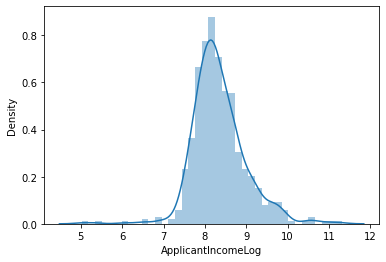

In [43]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

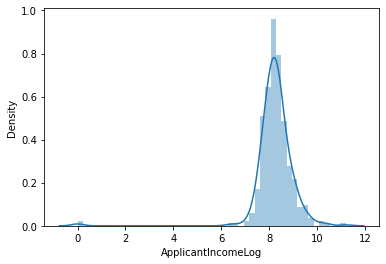

In [44]:
t['ApplicantIncomeLog'] = np.log(t['ApplicantIncome']+1)
sns.distplot(t['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

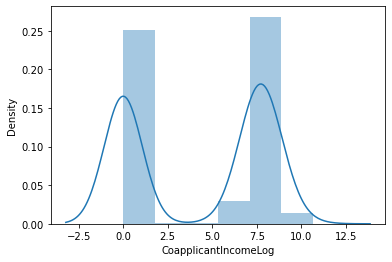

In [45]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

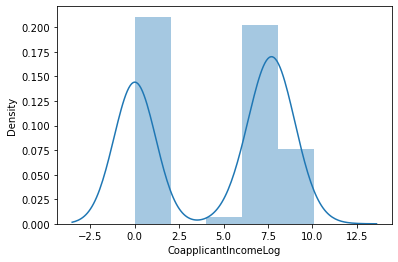

In [46]:
t['CoapplicantIncomeLog'] = np.log(t['CoapplicantIncome']+1)
sns.distplot(t['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

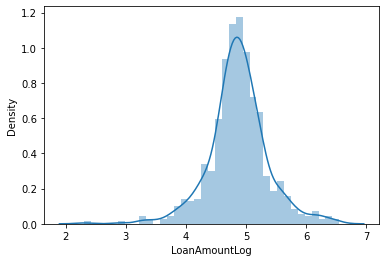

In [47]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

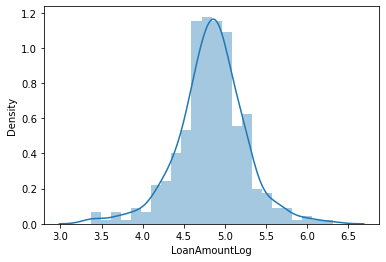

In [48]:
t['LoanAmountLog'] = np.log(t['LoanAmount']+1)
sns.distplot(t['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

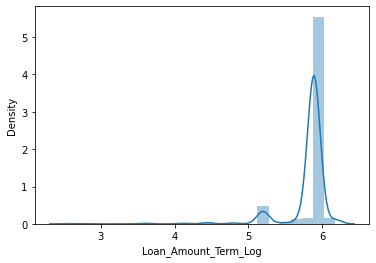

In [49]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

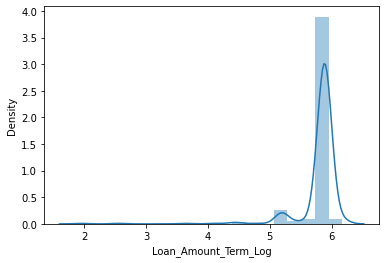

In [51]:
t['Loan_Amount_Term_Log'] = np.log(t['Loan_Amount_Term']+1)
sns.distplot(t['Loan_Amount_Term_Log'])

<AxesSubplot:xlabel='Credit_History(based on delinquency)_Log', ylabel='Density'>

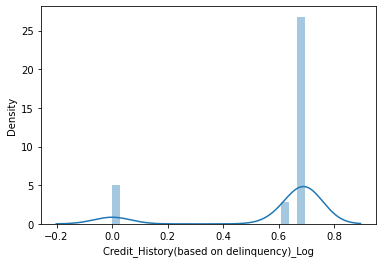

In [50]:
df['Credit_History(based on delinquency)_Log'] = np.log(df['Credit_History(based on delinquency)']+1)
sns.distplot(df['Credit_History(based on delinquency)_Log'])

<AxesSubplot:xlabel='Credit_History(based on delinquency)_Log', ylabel='Density'>

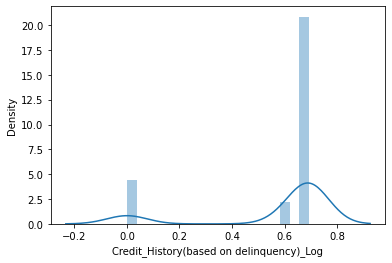

In [52]:
t['Credit_History(based on delinquency)_Log'] = np.log(t['Credit_History(based on delinquency)']+1)
sns.distplot(t['Credit_History(based on delinquency)_Log'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

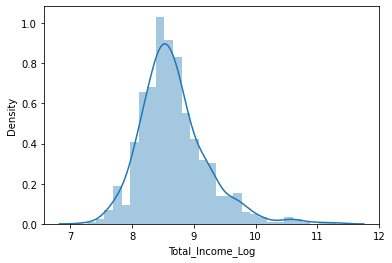

In [53]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_Log'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

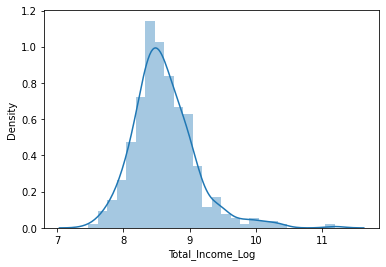

In [54]:
t['Total_Income_Log'] = np.log(t['Total_Income']+1)
sns.distplot(t['Total_Income_Log'])

# CORRELATION MATRIX

### correlation for numerical attributes

### high density plotted with dark colour and low density plotted with white colour


<AxesSubplot:>

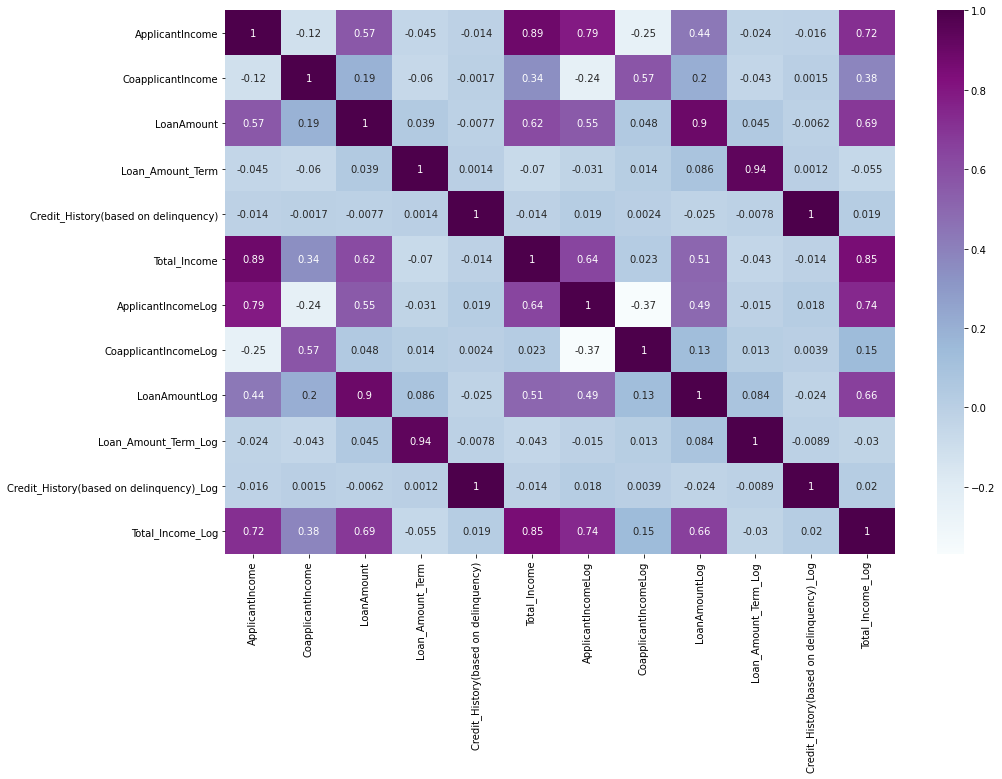

In [55]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

<AxesSubplot:>

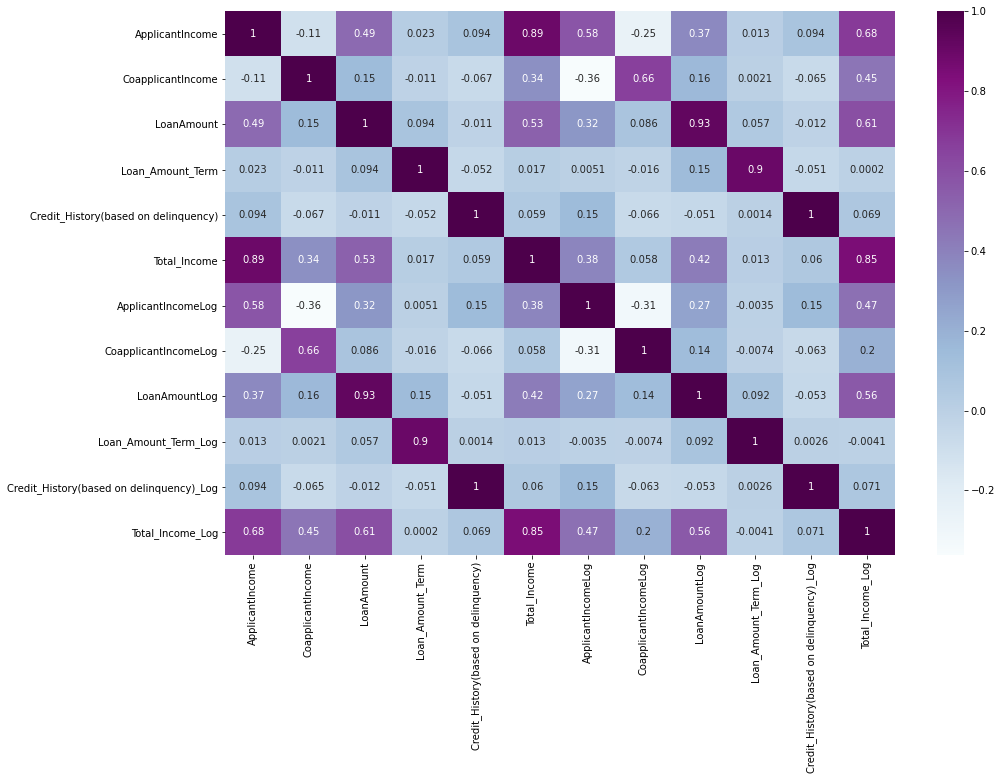

In [56]:
corr = t.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area,Loan_Sanction_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [58]:
t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History(based on delinquency),Property_Area,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720,8.651899,0.000000,4.709530,5.888878,0.693147,8.651899
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576,8.031710,7.313887,4.844187,5.888878,0.693147,8.428799
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800,8.517393,7.496097,5.342334,5.888878,0.693147,8.824825
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886,7.758333,7.842671,4.615121,5.888878,0.601823,8.494334
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276,8.094684,0.000000,4.369448,5.888878,0.693147,8.094684


## remove high correlated attributes(remove original terms keeping log terms) for training our model

### drop unnecessary columns

In [59]:
cols = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term' , 'Total_Income' , 'Loan_ID' , 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History(based on delinquency),Property_Area,Loan_Sanction_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,0.693147,8.699681


In [68]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History(based on delinquency)', 'Property_Area',
       'Loan_Sanction_Status', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'Credit_History(based on delinquency)_Log',
       'Total_Income_Log'],
      dtype='object')


In [ ]:
cols = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term' , 
        'Total_Income' , 'Loan_ID' , 'CoapplicantIncomeLog']
t = t.drop(columns=cols, axis=1)

In [73]:
t.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History(based on delinquency),Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.000000,Urban,8.651899,4.709530,5.888878,0.693147,8.651899
1,Male,Yes,1,Graduate,No,1.000000,Urban,8.031710,4.844187,5.888878,0.693147,8.428799
2,Male,Yes,2,Graduate,No,1.000000,Urban,8.517393,5.342334,5.888878,0.693147,8.824825
3,Male,Yes,2,Graduate,No,0.825444,Urban,7.758333,4.615121,5.888878,0.601823,8.494334
4,Male,No,0,Not Graduate,No,1.000000,Urban,8.094684,4.369448,5.888878,0.693147,8.094684


In [74]:
print(t.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History(based on delinquency)', 'Property_Area',
       'ApplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_Term_Log',
       'Credit_History(based on delinquency)_Log', 'Total_Income_Log'],
      dtype='object')


# LABEL ENCODING

## putting all the attributes in the dataset in numerical format to train our model easily

In [75]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Property_Area' , 'Loan_Sanction_Status' , 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History(based on delinquency),Property_Area,Loan_Sanction_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,0.693147,8.699681


### in Loan_Sanction_Status 1 represents Yes and 0 is No

In [77]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Property_Area' , 'Dependents']
le = LabelEncoder()
for col in cols:
    t[col] = le.fit_transform(t[col])

In [78]:
t.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History(based on delinquency),Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History(based on delinquency)_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.651899,4.709530,5.888878,0.693147,8.651899
1,1,1,1,0,0,1.000000,2,8.031710,4.844187,5.888878,0.693147,8.428799
2,1,1,2,0,0,1.000000,2,8.517393,5.342334,5.888878,0.693147,8.824825
3,1,1,2,0,0,0.825444,2,7.758333,4.615121,5.888878,0.601823,8.494334
4,1,0,0,1,0,1.000000,2,8.094684,4.369448,5.888878,0.693147,8.094684


# TRAIN - TEST SPLIT

### specifying input and output attribute

In [79]:
x = df.drop(columns=['Loan_Sanction_Status'], axis=1)
y = df['Loan_Sanction_Status']

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.25, random_state=42)

# MODEL TRAINING

### classify function

### cross validation - it is used for better validation of model


In [81]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is" , model.score(x_cv, y_cv)*100)
    ### cross validation - it is used for better validation of model
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 71.42857142857143
Cross validation is 71.17552978808476


In [84]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 77.92207792207793
Cross validation is 78.34199653471944


In [85]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is 72.72727272727273
Cross validation is 76.55204584832734


# HYPERPARAMETER TUNING

In [89]:
model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


# CONFUSION MATRIX

### A confusion matrix is a summary of prediction results on a classification problem.The number of correct and incorrect predictions are summarized with count values and broken down by each class.It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [93]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [94]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_cv)
cm = confusion_matrix(y_cv, y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

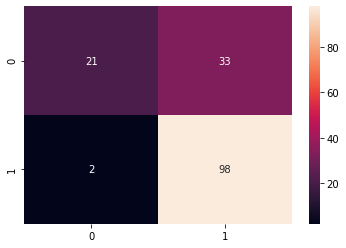

In [95]:
sns.heatmap(cm, annot=True)

# MODEL TESTING

In [96]:
x = pd.get_dummies(x)
df=pd.get_dummies(df)
t=pd.get_dummies(t)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.25, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### predicting the Loan_Sanction_Status for validation set and calculating its accuracy

In [99]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)*100

77.27272727272727

### predictions for the test dataset

In [100]:
pred_t = model.predict(t)

### import the submission file which we have to submit on the solution checker

In [101]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Loan_ID,Loan_Sanction_Status
0,LP001015,NaN
1,LP001022,NaN
2,LP001031,NaN
3,LP001035,NaN
4,LP001051,NaN


### We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of the test dataset and the predictions that we made, i.e., pred_test respectively.

In [102]:
submission['Loan_Sanction_Status'] = pred_t

### we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [103]:
submission['Loan_Sanction_Status'].replace(0, 'N' ,inplace=True)
submission['Loan_Sanction_Status'].replace(1, 'Y' ,inplace=True)

## we will convert the submission to .csv format and name it logistic.csv

In [104]:
pd.DataFrame(submission,columns=['Loan_ID' , 'Loan_Sanction_Status']).to_csv('logistic.csv')

### now test dataset contains Loan_Sanction_Status column predicted by trained model

In [105]:
see=pd.read_csv("logistic.csv")
see.head(10)

,Unnamed: 0,Loan_ID,Loan_Sanction_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y


## Hence this provides quick,immediate and easy way for Banks/Financial companies to choose the deserving applicants for loan approval by analyzing various Machine Learning Algorithms.